Given below are the special libraries that are needed to be downloaded for this project

In [ ]:
pip install essentia

In [ ]:
pip install librosa

In [ ]:
# Importing all the libraries

import pandas as pd
import os
import numpy as np
import essentia
import essentia.standard as es
from essentia.standard import *
import matplotlib.pyplot as plt

Blame It Lyrics -Jamie Foxx Ft. T-Pain.mp3
Pretty_Wings_Maxwell.mp3
Drake-Best-I-Ever-Had.mp3
Rockin__039__that_thang_The_Dream.mp3
Beyonc_-_Single_Ladies_Put_a_Ring_on_It.mp3
Keri_Hilson_Ft_Lil_Wayne_-_Turnin_Me_On.mp3
sobeautiful.mp3
Break_Up_Mario_ft_Gucci_Mane_lyrics.mp3
Ginuwine_-_Last_Chance.mp3
keri_hilson_Knock_You_down_lyrics.mp3
Young_Money_-_Every_Girl_Official_Music_Video.mp3
God_in_Me.mp3
Beyoncé_-_Ego.mp3
Ne-Yo_-_Mad_Lyrics.mp3
Jennifer_Hudson_-_If_This_Isnt_Love_with_Lyrics.mp3
TI_ft_Rihanna_Live_your_Life_lyricsofficial_video.mp3
Trey_Songz_Drake_-_Successful_Official_Video.mp3
KJON_On_The_Ocean.mp3
Jeremih_-_Birthday_Sex_Official_Music_Video.mp3
Ne-Yo - She Got Her Own ft. Jamie Foxx, Fabolous (Official Music Video).mp3
2009


In [ ]:
# This code block extracts frequencies from the audio files and store the frequencies, mean and standard deviation.

for i in range(2009,2020): 
  df = pd.DataFrame()
  print(i)
  for j in os.listdir('/content/drive/MyDrive/Intro to DH - songs dataset/'+str(i)): # To read all the audio files in the folders
    addr = '/content/drive/MyDrive/Intro to DH - songs dataset/'+str(i)+'/'+j
    loader = EqloudLoader(filename=addr, sampleRate=32000) 
    audio = loader()
    pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
    pitch_values, pitch_confidence = pitch_extractor(audio)
    df2 = pd.DataFrame({'name': j,'pitch_values': [pitch_values],'mean': np.mean(pitch_values),'std': np.std(pitch_values)})
    df = df.append(df2)
  df.to_csv(r'/content/drive/MyDrive/Intro to DH - songs dataset/freq'+str(i)+'.csv')

In [ ]:
# This code block is to create our machine learning model which is a random forest model. This model can be saved as well but I did not save it as it takes a few seconds to train the model and deploy it

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/Intro to DH - songs dataset/freq_no_autotune.csv')
X = []
y = []
for i in range(len(df)):
  # X.append([df['mean'][i]+df['std'][i]])
  X.append([df['std'][i]])
  y.append(0)
df = pd.read_csv('/content/drive/MyDrive/Intro to DH - songs dataset/freq_autotune.csv')
for i in range(len(df)):
  # X.append([df['mean'][i]+df['std'][i]])
  X.append([df['std'][i]])
  y.append(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=493) 
clf = RandomForestClassifier(max_depth=2, random_state=0) #using a random forest classifier for this problem
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
total = 0
correct = 0
for i,j in zip(y_pred,y_test):
  total+=1
  if i == j:
    correct+=1
print("Accuracy for the model is : " + str(correct/total))

Accuracy for the model is : 0.8


In [ ]:
# This code block is used to predict whether a song  is autotuned or not. We save all the data in a csv file for analysis

clf.fit(X, y) #training on all the data to get the best predictions
df = pd.DataFrame()

for i in range(2009,2021):
  df2 = pd.read_csv('/content/drive/MyDrive/Intro to DH - songs dataset/freq'+str(i)+'.csv')
  X = []
  for j in range(len(df2)):
    X.append([df2['std'][j]])
  y_pred = clf.predict(X)
  df3 = pd.DataFrame({'year': i,'number of autotuned songs': sum(y_pred)} , index=[str(i)])
  print(df3)
  df2 = df2.append(df3)
  print(df2)

df.to_csv(r'/content/drive/MyDrive/Intro to DH - songs dataset/autotuned_songs_for_each_year.csv') 

      year  number of autotuned songs
2009  2009                         11
      Unnamed: 0  ... number of autotuned songs
0            0.0  ...                       NaN
1            0.0  ...                       NaN
2            0.0  ...                       NaN
3            0.0  ...                       NaN
4            0.0  ...                       NaN
5            0.0  ...                       NaN
6            0.0  ...                       NaN
7            0.0  ...                       NaN
8            0.0  ...                       NaN
9            0.0  ...                       NaN
10           0.0  ...                       NaN
11           0.0  ...                       NaN
12           0.0  ...                       NaN
13           0.0  ...                       NaN
14           0.0  ...                       NaN
15           0.0  ...                       NaN
16           0.0  ...                       NaN
17           0.0  ...                       NaN
18          

In [ ]:
# clf.fit(X, y) #training on all the data to get the best predictions
df = pd.DataFrame()
index = 0
for i in range(2009,2021):
  df2 = pd.read_csv('/content/drive/MyDrive/Intro to DH - songs dataset/freq'+str(i)+'.csv')
  X = []
  for j in range(len(df2)):
    X.append([df2['std'][j]])
  y_pred = clf.predict(X)
  # print(y_pred)
  # df3 = pd.DataFrame({'number of autotuned songs': y_pred)} , index9=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
  # print(df3)
  for j in range(len(df2)):
    if(y_pred[j]==0):
      df3 = pd.DataFrame({'name': df2['name'][j],'pitch_values': df2['pitch_values'][j],'mean': df2['mean'][j],'std': df2['std'][j], 'year':i},index = [index])
      df = df.append(df3)
      index+=1
  print(df)
  # print(df2)
df.to_csv(r'/content/drive/MyDrive/Intro to DH - songs dataset/data_not_auto.csv') 

                                                name  ...  year
0                           Pretty_Wings_Maxwell.mp3  ...  2009
1                          Drake-Best-I-Ever-Had.mp3  ...  2009
2              Rockin__039__that_thang_The_Dream.mp3  ...  2009
3                         Ginuwine_-_Last_Chance.mp3  ...  2009
4  Young_Money_-_Every_Girl_Official_Music_Video.mp3  ...  2009
5                                 Beyoncé_-_Ego.mp3  ...  2009
6                             Ne-Yo_-_Mad_Lyrics.mp3  ...  2009
7   Trey_Songz_Drake_-_Successful_Official_Video.mp3  ...  2009
8    Jeremih_-_Birthday_Sex_Official_Music_Video.mp3  ...  2009

[9 rows x 5 columns]
                                                 name  ...  year
0                            Pretty_Wings_Maxwell.mp3  ...  2009
1                           Drake-Best-I-Ever-Had.mp3  ...  2009
2               Rockin__039__that_thang_The_Dream.mp3  ...  2009
3                          Ginuwine_-_Last_Chance.mp3  ...  2009
4   Young_Mon

In [ ]:
df

,year,number of autotuned songs
2009,2009,11
2010,2010,9
2011,2011,9
2012,2012,13
2013,2013,10
2014,2014,10
2015,2015,14
2016,2016,11
2017,2017,11
2018,2018,10


The text blocks given below can be used for other projects where we can extract the melody, beats per minute or the amplitude of the song and create a more complex to model

In [ ]:
import pandas as pd
import os
import numpy as np
df = pd.DataFrame()
for j in os.listdir('/content/drive/MyDrive/Intro to DH - songs dataset/songs_no_autotune'):
  addr = '/content/drive/MyDrive/Intro to DH - songs dataset/songs_no_autotune'+'/'+j
  loader = EqloudLoader(filename=addr, sampleRate=32000) 
  audio = loader()
  pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
  pitch_values, pitch_confidence = pitch_extractor(audio)
  df2 = pd.DataFrame({'name': j,'pitch_values': [pitch_values],'mean': np.mean(pitch_values),'std': np.std(pitch_values)})
  df = df.append(df2)
df.to_csv(r'/content/drive/MyDrive/Intro to DH - songs dataset/freq_no_autotune.csv')

KeyboardInterrupt: ignored

Duration of the audio sample [sec]:
307.2232199546485


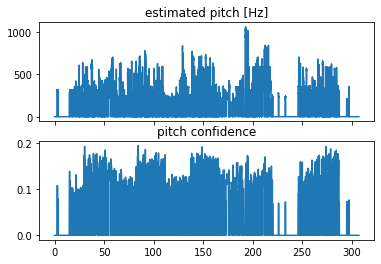

In [ ]:
# Load audio file; it is recommended to apply equal-loudness filter for PredominantPitchMelodia
loader = EqloudLoader(filename='/content/drive/MyDrive/Intro to DH - songs dataset/2011/All of the lights - Kanye West LYRICS.mp3', sampleRate=44100)
audio = loader()
print("Duration of the audio sample [sec]:")
print(len(audio)/44100.0)

# Extract the pitch curve
# PitchMelodia takes the entire audio signal as input (no frame-wise processing is required)

pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
pitch_values, pitch_confidence = pitch_extractor(audio)

# Pitch is estimated on frames. Compute frame time positions
pitch_times = numpy.linspace(0.0,len(audio)/44100.0,len(pitch_values) )

# Plot the estimated pitch contour and confidence over time
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(pitch_times, pitch_values)
axarr[0].set_title('estimated pitch [Hz]')
axarr[1].plot(pitch_times, pitch_confidence)
axarr[1].set_title('pitch confidence')
plt.show()

In [ ]:
import pandas as pd
import os
import numpy as np

for i in range(2012,2021):
  df = pd.DataFrame()
  for j in os.listdir('/content/drive/MyDrive/Intro to DH - songs dataset/'+str(i)):
    addr = '/content/drive/MyDrive/Intro to DH - songs dataset/'+str(i)+'/'+j
    loader = EqloudLoader(filename=addr, sampleRate=32000) 
    audio = loader()
    pitch_extractor = PredominantPitchMelodia(frameSize=2048, hopSize=128)
    pitch_values, pitch_confidence = pitch_extractor(audio)
    df2 = pd.DataFrame({'name': j,'pitch_values': [pitch_values],'mean': np.mean(pitch_values),'std': np.std(pitch_values)})
    df = df.append(df2)
  df.to_csv(r'/content/drive/MyDrive/Intro to DH - songs dataset/freq'+str(i)+'.csv')
  print(i)

2012
2013
2014
2015
2016
2017
2018
2019
2020


In [ ]:

# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                              rhythmStats=['mean', 'stdev'],
                                              tonalStats=['mean', 'stdev'])('/content/drive/MyDrive/Intro to DH - songs dataset/2011/All of the lights - Kanye West LYRICS.mp3')

# See all feature names in the pool in a sorted order
print(sorted(features.descriptorNames()))

['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

In [ ]:
audio = MonoLoader(filename='/content/1-01 High for This.mp3')()

# Compute beat positions and BPM
rhythm_extractor = RhythmExtractor2013(method="multifeature")
bpm, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audio)

print("BPM:", bpm)
print("Beat positions (sec.):", beats)
print("Beat estimation confidence:", beats_confidence)

# Mark beat positions on the audio and write it to a file
# Let's use beeps instead of white noise to mark them, as it's more distinctive
marker = AudioOnsetsMarker(onsets=beats, type='beep')
marked_audio = marker(audio)
MonoWriter(filename='/content/1-01 High for This.mp3')(marked_audio)

BPM: 74.90253448486328
Beat positions (sec.): [  0.5340589   1.0913378   1.6370068   2.1710658   2.7051246   3.2391837
   3.7848525   4.3305216   4.8878      5.4450793   5.9559183   6.4783673
   7.0008163   7.4303856   7.836735    8.243084    8.649433    9.067392
   9.485352    9.903311   10.32127    10.704399   11.075918   11.459047
  11.877007   12.294966   12.701315   13.107664   13.514013   13.920362
  14.326712   14.744671   15.09297    15.45288    15.812789   16.184309
  16.590658   16.997007   17.414967   17.832924   18.239275   18.657232
  19.063581   19.469933   19.876282   20.294239   20.70059    21.118547
  21.513288   21.908028   22.314377   22.720726   23.115465   23.533424
  23.951384   24.380953   24.798912   25.205261   25.634829   26.041178
  26.447527   26.842268   27.248617   27.654966   28.049706   28.444445
  28.850794   29.257143   29.663492   30.058231   30.46458    30.87093
  31.265669   31.660408   32.055145   32.461494   32.867844   33.262585
  33.657322   34.

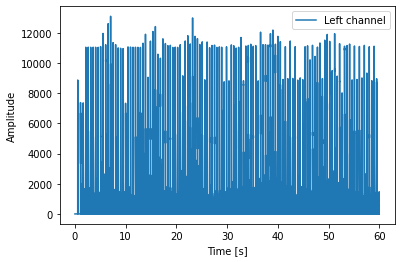

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

samplerate, data = wavfile.read("BabyElephantWalk60.wav")
length = data.shape[0] / samplerate
data = abs(data)
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:], label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()